In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/data.csv")
data["event_time"] = pd.to_datetime(data['event_time'])

# view x,y summary

In [3]:
data.describe()

,x,y
count,34318.000000,34318.000000
mean,-110.942199,34.447541
std,0.121354,0.100353
min,-111.288415,34.218296
25%,-111.040950,34.383616
50%,-110.926965,34.423903
75%,-110.875336,34.508899
max,-110.600194,34.683646


# view event time distribution

In [4]:
data["event_time"].min()

Timestamp('2017-06-01 00:04:49')

In [5]:
data["event_time"].max()

Timestamp('2017-06-29 23:59:56')

In [6]:
data["time_diff_seconds"] = data["event_time"].diff(1).dt.total_seconds()
data["time_diff_seconds"].describe()


count    34317.000000
mean        73.004837
std        677.622960
min          0.000000
25%         10.000000
50%         25.000000
75%         57.000000
max      27147.000000
Name: time_diff_seconds, dtype: float64

<AxesSubplot:>

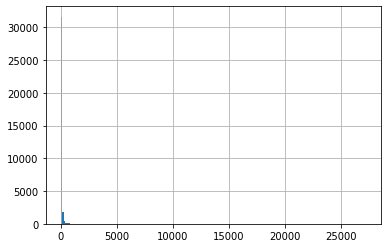

In [17]:
data["time_diff_seconds"].hist(bins=200)

In [14]:
data["time_diff_seconds"].sort_values().tail(10)

23598    24716.0
6063     24759.0
14125    24785.0
30965    24786.0
20123    24980.0
21286    25603.0
15138    26047.0
29960    26645.0
28732    27147.0
0            NaN
Name: time_diff_seconds, dtype: float64

# time one-hot encoder

In [18]:
def one_hot(time):
    """
    
    """
    encode = np.zeros(24+7)
    hour = time.hour
    day = time.weekday()
    encode[[hour,24+day]] = 1
    return encode
    

# X, Y normalization

In [23]:
mean_x = data["x"].mean()
mean_y = data["y"].mean()
std_x = data["x"].std()
std_y = data["y"].std()

In [17]:
pd.Timestamp('2017-06-26 23:59:56').weekday()

0

In [21]:
one_hot(pd.Timestamp('2017-06-27 23:59:56'))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.])